In [1]:
# Importing all neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.tree import DecisionTreeRegressor

In [3]:
import chart_studio.plotly as py
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected = True)
import cufflinks as cf
cf.go_offline()

In [4]:
from sklearn.model_selection  import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler

In [5]:
df = pd.read_csv(r"C:\Users\avira\Life Expectancy Data.csv")
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [6]:
print("Columns in this dataset are -->\n")
for i in df.columns:
    print(i)

Columns in this dataset are -->

Country
Year
Status
Life expectancy 
Adult Mortality
infant deaths
Alcohol
percentage expenditure
Hepatitis B
Measles 
 BMI 
under-five deaths 
Polio
Total expenditure
Diphtheria 
 HIV/AIDS
GDP
Population
 thinness  1-19 years
 thinness 5-9 years
Income composition of resources
Schooling


# About this dataset

The Global Health Observatory (GHO) data repository under World Health Organization (WHO) keeps track of the health status as well as many other related factors for all countries The datasets are made available to public for the purpose of health data analysis. The dataset related to life expectancy, health factors for 193 countries has been collected from the same WHO data repository website and its corresponding economic data was collected from United Nation website. Among all categories of health-related factors only those critical factors were chosen which are more representative.   The data in this project is from year 2000-2015 for 193 countries for further analysis.

In [7]:
print("This dataset has about {} rows and {} columns".format(df.shape[0], df.shape[1]))

This dataset has about 2938 rows and 22 columns


This dataset consists of 22 Columns and 2938 rows which meant 20 predicting variables.

The data was collected from WHO and United Nations website with the help of Deeksha Russell and Duan Wang.

# Our Aim for this Dataset

The data-set aims to answer the following key questions:

1. Does various predicting factors which has been chosen initially really affect the Life expectancy? What are the predicting variables actually affecting the life expectancy?
2. Should a country having a lower life expectancy value(<65) increase its healthcare expenditure in order to improve its average lifespan?
3. How does Infant and Adult mortality rates affect life expectancy?
4. Does Life Expectancy has positive or negative correlation with eating habits, lifestyle, exercise, smoking, drinking alcohol etc.
5. What is the impact of schooling on the lifespan of humans?
6. Does Life Expectancy have positive or negative relationship with drinking alcohol?
7. Do densely populated countries tend to have lower life expectancy?
8. What is the impact of Immunization coverage on life Expectancy?

# Exploratory Data Analysis

Exploratory Data Analysis (EDA) is an approach for data analysis that employs a variety of techniques of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis,etc.

Our major goal will be to :
1. maximize insight into the data set;
2. uncover underlying structure;
3. extract important variables;
4. detect outliers and anomalies;
5. test underlying assumptions;
6. Clean the data as per requirement 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

Information about some not so obvious columns in this dataset :
    
    
Status generaly is if the country is Developed or Developing  
Adult Morality is rates of both sexes or the probability of dying between 15 and 60 years per 1000 population  
Infant Deaths are number of Infant Deaths per 1000 population  
Alcohol is recorded per capita (15+) consumption (in litres of pure alcohol)  
Percentage Expenditure is expenditure on health as a percentage of Gross Domestic Product per capita(%)  
Hepatitis B (HepB) immunization coverage among 1-year-olds  
Measles - number of reported cases per 1000 population  



In [9]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


Note that the standard deviation of the features Infant deaths, Percentage Expenditure , Measles, Under five deaths,GDP,Population is a lot higher than the mean(more than twice).

This implies that the data is not centered around its mean and are more spread out. Or we can say there is large variation in the data ranging from min-max.

We can see there are also many outliers:  
    1. Infant deaths as low as 1000.It is likely an outlier  
    2. Under 5 deaths same as infant, which is perhaps even immpossible to have 0 values  
    3. Population of GDP 34 of an entire Country  
    4. BMI of 1 and 87.3? ( A BMI of 15 or lower is seriously underweight and a BMI of 40 or higher is morbidly obese)  
    All these outliers will be dealt as null value  

In [10]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

A lot of data is missing we need to tackle it.
My take would be to just fill with mean in the necessary columns

In [11]:
print("No of countries in this dataset: {}".format(len(np.unique(df.Country))))
print("\nStatus of the Countries:")
df.Status.value_counts()

No of countries in this dataset: 193

Status of the Countries:


Developing    2426
Developed      512
Name: Status, dtype: int64

In [12]:
plt.figure(figsize=(7,7))
arr = df.groupby('Year').mean()['Life expectancy ']
arr.iplot()

<Figure size 504x504 with 0 Axes>

As we can see from this line graph that mean life expectancy has been increased from the year 2000  
to 2014 by 4 years.

In [13]:
grouped_by_year = df.groupby('Year').mean()
grouped_by_year

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,,,,,,,,,,,,,,,,,,,
2000,66.750273,181.475410,37.540984,4.570714,473.850781,74.035294,4663.792350,34.424862,53.726776,76.277778,5.585475,73.627778,2.530055,4708.515191,9.440444e+06,5.147514,5.244751,0.512214,10.512717
2001,67.128962,175.169399,36.825137,4.555659,516.625910,73.957895,4640.262295,36.135912,52.038251,77.950000,5.599609,76.661111,2.573770,4854.527638,1.007057e+07,4.957459,5.055249,0.563012,10.950289
2002,67.351366,171.437158,35.584699,4.660934,476.794487,76.522124,3204.754098,37.110497,50.300546,79.679558,5.687989,78.883978,2.573770,4599.303043,6.625328e+06,5.166298,5.118232,0.568006,11.140462
2003,67.433333,169.131148,34.874317,4.690495,494.706547,74.099237,3708.792350,36.440331,48.584699,80.353591,5.827444,78.867403,2.546995,4774.835677,1.015988e+07,4.924309,5.023757,0.572399,11.308092
2004,67.646448,186.262295,33.644809,4.753681,772.336156,77.985507,2805.497268,36.572376,47.092896,80.165746,5.859111,79.823204,2.478689,7055.889709,1.685299e+07,4.936464,5.029282,0.584168,11.547399
2005,68.209290,167.633880,32.366120,4.846409,823.318110,80.911565,3200.551913,35.607735,45.306011,80.972376,5.920722,81.674033,2.345902,7249.787557,1.828185e+07,5.099448,5.195580,0.596445,11.675723
2006,68.667760,170.404372,31.808743,4.917692,828.776319,81.894040,2063.224044,37.534254,44.273224,84.527473,5.699000,82.236264,2.169399,7347.033143,1.536564e+07,5.115470,5.157459,0.632312,11.917919
2007,69.036066,159.808743,30.612022,5.014066,954.458468,81.584906,1557.540984,36.977901,42.732240,84.802198,5.631056,84.318681,1.992896,8537.243114,1.853530e+07,5.034807,4.976243,0.639000,12.038150
2008,69.427869,174.519126,29.568306,5.007088,1095.802669,83.644172,1523.229508,38.225414,41.322404,85.565934,5.723056,84.857143,1.797268,10604.040364,9.487742e+06,4.907182,4.941436,0.645717,12.176301


From this mean data of all the countries by year we can get  
1. Adult Mortality has been decreased
2. Death of infants had also been decreased
3. Alchohal consumption has show increment so has the overall expenditure

<Figure size 2520x1440 with 0 Axes>

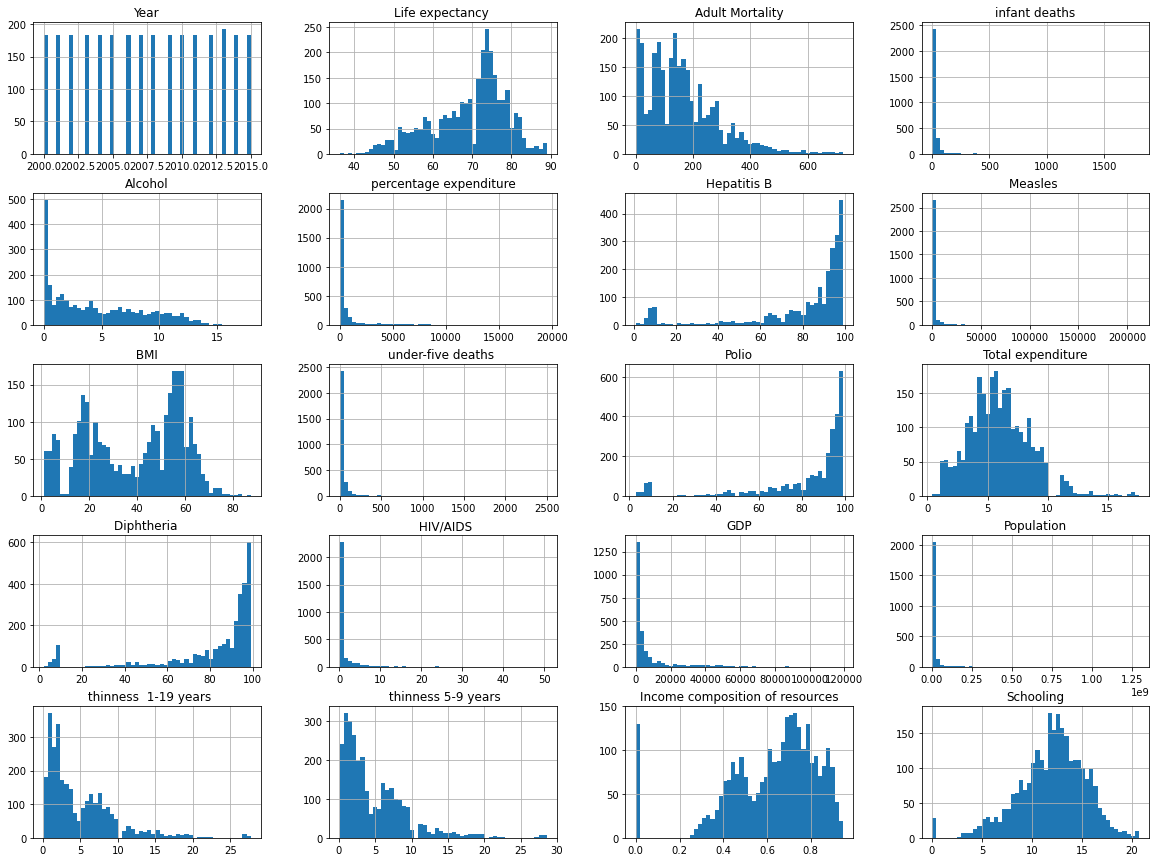

In [14]:
plt.figure(figsize = (35,20))
df.hist(bins = 50,
               figsize = (20,15))
plt.show()

All these attributes are in different scales so feature scaling would be required.

In [15]:
corr_matrix = df.corr()
np.abs(corr_matrix).nlargest(10, 'Life expectancy ')

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Life expectancy,0.170033,1.000000,0.696359,0.196557,0.404877,0.381864,0.256762,0.157586,0.567694,0.222529,0.465556,0.218086,0.479495,0.556556,0.461455,0.021538,0.477183,0.471584,0.724776,0.751975
Schooling,0.209400,0.751975,0.454612,0.193720,0.547378,0.389687,0.231117,0.137225,0.546961,0.209373,0.417866,0.246384,0.425332,0.220429,0.448273,0.031668,0.471652,0.460632,0.800092,1.000000
Income composition of resources,0.243468,0.724776,0.457626,0.145139,0.450040,0.381952,0.199549,0.129568,0.508774,0.163305,0.381078,0.166682,0.401456,0.249519,0.460341,0.008735,0.422429,0.411053,1.000000,0.800092
Adult Mortality,0.079052,0.696359,1.000000,0.078756,0.195848,0.242860,0.162476,0.031176,0.387017,0.094146,0.274823,0.115281,0.275131,0.523821,0.296049,0.013647,0.302904,0.308457,0.457626,0.454612
BMI,0.108974,0.567694,0.387017,0.227279,0.330408,0.228700,0.150380,0.175977,1.000000,0.237669,0.284569,0.242503,0.283147,0.243717,0.301557,0.072301,0.532025,0.538911,0.508774,0.546961
HIV/AIDS,0.139741,0.556556,0.523821,0.025231,0.048845,0.097857,0.112675,0.030899,0.243717,0.038062,0.159560,0.001389,0.164860,1.000000,0.136491,0.027854,0.204064,0.207283,0.249519,0.220429
Diphtheria,0.134337,0.479495,0.275131,0.175171,0.222020,0.143624,0.611495,0.141882,0.283147,0.195668,0.673553,0.152754,1.000000,0.164860,0.200666,0.028444,0.229518,0.222743,0.401456,0.425332
thinness 1-19 years,0.047876,0.477183,0.302904,0.465711,0.428795,0.251369,0.120429,0.224808,0.532025,0.467789,0.221823,0.277101,0.229518,0.204064,0.285697,0.253944,1.000000,0.939102,0.422429,0.471652
thinness 5-9 years,0.050929,0.471584,0.308457,0.471350,0.417414,0.252905,0.124960,0.221072,0.538911,0.472263,0.222592,0.283774,0.222743,0.207283,0.290539,0.251403,0.939102,1.000000,0.411053,0.460632
Polio,0.094158,0.465556,0.274823,0.170689,0.221734,0.147259,0.486171,0.136166,0.284569,0.188720,1.000000,0.137330,0.673553,0.159560,0.211976,0.038540,0.221823,0.222592,0.381078,0.417866


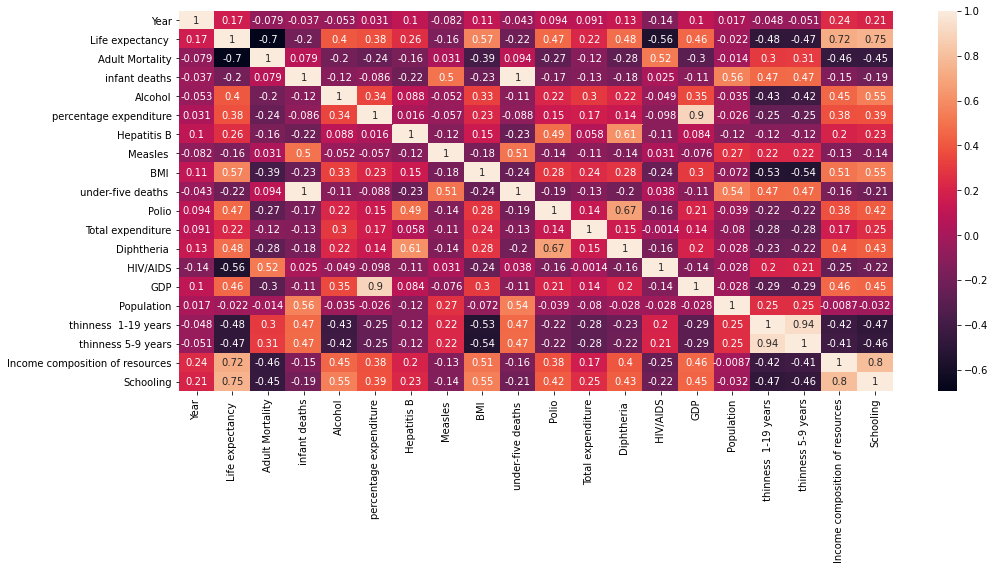

In [16]:
plt.figure(figsize=(16,7))
sns.heatmap(corr_matrix, annot = True)
plt.show()

# Predicting values that actually affect Life expectancy

1. Schooling(+0.75)
2. Income composition of resources(+0.69)
3. HIV/AIDS(-0.56)
4. Adult mortality(-0.7)
5. BMI(+0.57)
6. thinness 1-19years(-0.47)
7. thiness 5-9years(-0.46)
8. GDP(+0.46)
9. Diphtheria(+0.48)
10. Polio(+0.47)

Adult Mortality and Schooling are the factors with higher correlation to life expectancy

Adult mortality rate affect more than infant mortality rate on life expectancy.  
    1. Correlation of infant mortality and life expectancy = -0.2   
    2. Correlation of adult mortality and life expectancy = -0.7  

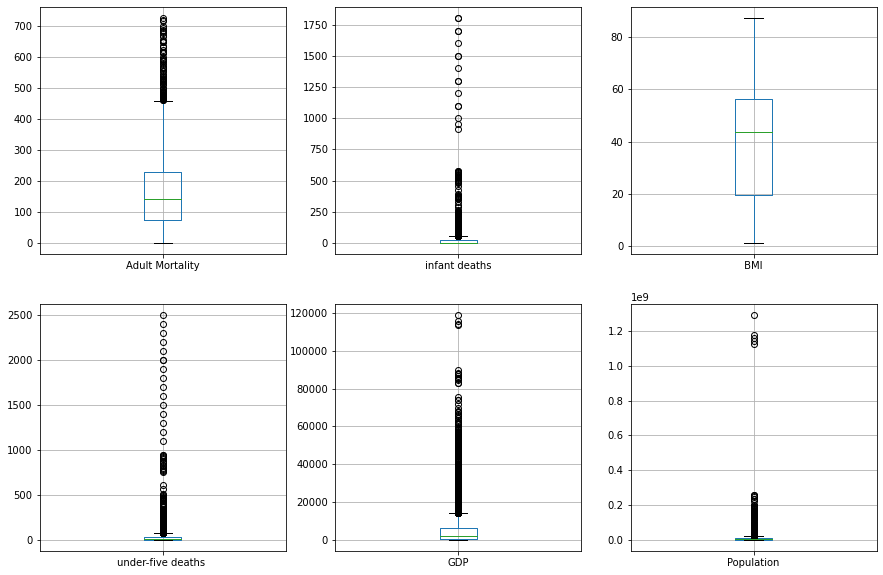

In [17]:
plt.figure(figsize = (15,10))
for i, col in enumerate(['Adult Mortality','infant deaths',' BMI ','under-five deaths ', 'GDP', 'Population'], start = 1):
    plt.subplot(2, 3, i)
    df.boxplot(col)

These seems to be certainly outliers:  
       
    Infant deaths of 0    
    BMI less than 10 and greater than 50  
    Under Five deaths of 0  

Converting all these values to null

In [18]:
df["under-five deaths "] =df["under-five deaths "].replace(0,np.nan)

In [19]:
df[" BMI "] =df.apply(lambda x : np.nan if (x[" BMI "] <10 or x[" BMI "] >50) else x[" BMI "],axis =1)

In [20]:
df["infant deaths"] = df["infant deaths"].replace(0,np.nan)

# Data Cleaning

<AxesSubplot:>

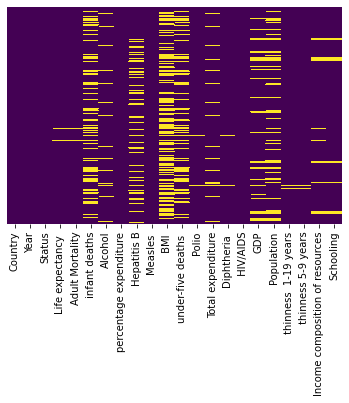

In [21]:
#sns.set(font_scale=1.5)
sns.heatmap(df.isnull(),yticklabels = False,cbar = False, cmap = 'viridis')

In [22]:
df.isnull().sum()

Country                               0
Year                                  0
Status                                0
Life expectancy                      10
Adult Mortality                      10
infant deaths                       848
Alcohol                             194
percentage expenditure                0
Hepatitis B                         553
Measles                               0
 BMI                               1456
under-five deaths                   785
Polio                                19
Total expenditure                   226
Diphtheria                           19
 HIV/AIDS                             0
GDP                                 448
Population                          652
 thinness  1-19 years                34
 thinness 5-9 years                  34
Income composition of resources     167
Schooling                           163
dtype: int64

In [23]:
# Computing % of null values
column_to_drop = {}
for col in df.columns:
    null_col = df[col].isnull().sum()
    per_val = null_col* 100/df.shape[0]
    if per_val > 0:
        print("The column {} has **{:.3f}%** of null values".format(col, per_val)) 
    if per_val <= 2.0 and per_val != 0.0:
        column_to_drop[col] = per_val
print("Remaining columns have no null values")

The column Life expectancy  has **0.340%** of null values
The column Adult Mortality has **0.340%** of null values
The column infant deaths has **28.863%** of null values
The column Alcohol has **6.603%** of null values
The column Hepatitis B has **18.822%** of null values
The column  BMI  has **49.558%** of null values
The column under-five deaths  has **26.719%** of null values
The column Polio has **0.647%** of null values
The column Total expenditure has **7.692%** of null values
The column Diphtheria  has **0.647%** of null values
The column GDP has **15.248%** of null values
The column Population has **22.192%** of null values
The column  thinness  1-19 years has **1.157%** of null values
The column  thinness 5-9 years has **1.157%** of null values
The column Income composition of resources has **5.684%** of null values
The column Schooling has **5.548%** of null values
Remaining columns have no null values


In [24]:
column_to_drop

{'Life expectancy ': 0.34036759700476515,
 'Adult Mortality': 0.34036759700476515,
 'Polio': 0.6466984343090538,
 'Diphtheria ': 0.6466984343090538,
 ' thinness  1-19 years': 1.1572498298162015,
 ' thinness 5-9 years': 1.1572498298162015}

In [25]:
df.dropna(axis = 0, subset=column_to_drop.keys(), inplace = True)

We have removed all the rows of the of the columns which have percentage value of null values  
less than 2%.Now are main goal is to takle other missing values of this dataset

<AxesSubplot:>

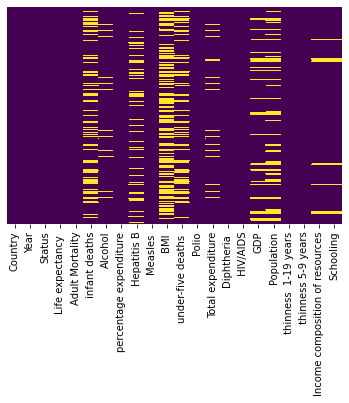

In [26]:
sns.heatmap(df.isnull(),yticklabels = False,cbar = False, cmap = 'viridis')

In [27]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62.0,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64.0,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66.0,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69.0,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71.0,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [28]:
corr_matrix['Alcohol']

Year                              -0.052990
Life expectancy                    0.404877
Adult Mortality                   -0.195848
infant deaths                     -0.115638
Alcohol                            1.000000
percentage expenditure             0.341285
Hepatitis B                        0.087549
Measles                           -0.051827
 BMI                               0.330408
under-five deaths                 -0.112370
Polio                              0.221734
Total expenditure                  0.296942
Diphtheria                         0.222020
 HIV/AIDS                         -0.048845
GDP                                0.354712
Population                        -0.035252
 thinness  1-19 years             -0.428795
 thinness 5-9 years               -0.417414
Income composition of resources    0.450040
Schooling                          0.547378
Name: Alcohol, dtype: float64

In [29]:
# adding columns whose correlation with alcohol is more than .40
corr_columns = []
for col in corr_matrix.columns:
    if np.abs(corr_matrix['Alcohol'][col]) > 0.40:
        corr_columns.append(col)
print(corr_columns)

['Life expectancy ', 'Alcohol', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']


In [30]:
data = df[corr_columns]
impute_data = data[data['Alcohol'].isnull() == True].drop('Alcohol', axis = 1)
impute_data.head()

,Life expectancy,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
32,75.6,6.0,5.8,0.743,14.4
48,52.4,8.3,8.2,0.531,11.4
64,76.4,3.3,3.3,0.784,13.9
80,76.3,1.0,0.9,0.826,17.3
96,74.8,2.1,2.2,0.741,12.7


Now we are going to use impute data to predict nan values of alcohol 

In [31]:
data.dropna(axis=0, inplace = True)

In [32]:
X = data.drop('Alcohol', axis = 1)
Y = data['Alcohol']

In [33]:
dt = DecisionTreeRegressor()
dt.fit(X,Y)

DecisionTreeRegressor()

In [34]:
predicted_values = dt.predict(impute_data.dropna(axis = 0))
predicted_values

array([1.000e-02, 8.330e+00, 8.560e+00, 7.930e+00, 1.030e+00, 9.710e+00,
       1.232e+01, 1.000e-02, 6.740e+00, 6.700e+00, 1.600e+00, 8.820e+00,
       1.394e+01, 9.530e+00, 7.000e+00, 1.000e-02, 1.000e-02, 3.620e+00,
       6.740e+00, 1.000e-02, 7.320e+00, 1.000e-02, 1.203e+01, 1.000e-02,
       1.000e-02, 1.000e-02, 1.000e-02, 1.000e-02, 9.620e+00, 1.000e-02,
       1.230e+00, 7.160e+00, 4.480e+00, 4.380e+00, 1.000e-02, 7.840e+00,
       3.450e+00, 1.214e+01, 4.370e+00, 1.000e-02, 9.640e+00, 3.800e-01,
       5.920e+00, 6.650e+00, 2.100e-01, 4.130e+00, 2.580e+00, 1.000e-02,
       1.000e-02, 1.000e-02, 1.000e-02, 9.810e+00, 1.056e+01, 1.000e-02,
       1.000e-02, 6.130e+00, 1.000e-02, 1.000e-02, 7.050e+00, 8.420e+00,
       1.880e+00, 1.000e-02, 1.000e-02, 7.490e+00, 1.000e-02, 3.080e+00,
       1.063e+01, 7.450e+00, 3.070e+00, 9.000e-02, 1.000e-02, 1.700e-01,
       1.075e+01, 2.620e+00, 9.710e+00, 4.200e+00, 1.000e-02, 4.100e-01,
       1.148e+01, 1.000e-02, 5.300e-01, 8.180e+00, 

In [35]:
df['Alcohol'] = df['Alcohol'].fillna(predicted_values[0])

In [36]:
df.isnull().sum()

Country                               0
Year                                  0
Status                                0
Life expectancy                       0
Adult Mortality                       0
infant deaths                       832
Alcohol                               0
percentage expenditure                0
Hepatitis B                         525
Measles                               0
 BMI                               1408
under-five deaths                   769
Polio                                 0
Total expenditure                   212
Diphtheria                            0
 HIV/AIDS                             0
GDP                                 435
Population                          644
 thinness  1-19 years                 0
 thinness 5-9 years                   0
Income composition of resources     160
Schooling                           160
dtype: int64

In [37]:
df.shape

(2888, 22)

In [38]:
# filling total expenditure column's missing value
df['Total expenditure'].fillna(df['Total expenditure'].mean(), inplace =True)

In [39]:
df.isnull().sum()

Country                               0
Year                                  0
Status                                0
Life expectancy                       0
Adult Mortality                       0
infant deaths                       832
Alcohol                               0
percentage expenditure                0
Hepatitis B                         525
Measles                               0
 BMI                               1408
under-five deaths                   769
Polio                                 0
Total expenditure                     0
Diphtheria                            0
 HIV/AIDS                             0
GDP                                 435
Population                          644
 thinness  1-19 years                 0
 thinness 5-9 years                   0
Income composition of resources     160
Schooling                           160
dtype: int64

In [40]:
df['GDP'].fillna(df['GDP'].mean(), inplace =True)
df['Population'].fillna(df['Population'].mean(), inplace =True)
df['Hepatitis B'].fillna(df['Hepatitis B'].mean(), inplace =True)
df['Income composition of resources'].fillna(df['Income composition of resources'].mean(), inplace =True)
df['Schooling'].fillna(df['Schooling'].mean(), inplace =True)
df['infant deaths'].fillna(df['infant deaths'].mean(), inplace = True)
df[' BMI '].fillna(df[' BMI '].mean(), inplace = True)
df['under-five deaths '].fillna(df['under-five deaths '].mean(), inplace = True)

In [41]:
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

As you can see we have tackled all the missing data points

# Data Visualisation

In [42]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62.0,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64.0,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66.0,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69.0,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71.0,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [43]:
plt.figure(figsize=(10,8))
px.histogram(df, x="Status", color_discrete_sequence=['indianred'])

<Figure size 720x576 with 0 Axes>

In [44]:
plt.figure(figsize=(7,7))
px.line(grouped_by_year, y='Adult Mortality', title = 'Adult Death Mortality Rate')

<Figure size 504x504 with 0 Axes>

In [45]:
fig = px.scatter(df, y="GDP")
fig.show()

In [46]:
px.line(grouped_by_year, y='Schooling', title = 'Adult Death Mortality Rate')

In [47]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62.0,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64.0,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66.0,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69.0,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71.0,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


# Applying ML Algorithms

We can see it is a Supervised Learning Task since we have given labelled Training Examples.
Moreover, it is also a typical regression task, since you are asked to predict a value.

It is also a multivariate regression problem since system will use multiple features to make predictions.

In [48]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [49]:
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns = ["Life expectancy ","Country","Status","Year"],axis = 1),df["Life expectancy "],
                                                 test_size = 0.2,random_state = 42)

Here we are taking all the necessary columns tha could help in predicitng Life Expectancy  
and removing columns such as country status and year

In [50]:
std_scaler = StandardScaler()
X_train_scaled = std_scaler.fit_transform(X_train)

In [51]:
df.head(3)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62.0,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64.0,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66.0,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9


# Linear Regression

In [52]:
linear_regressor = LinearRegression()

linear_regressor.fit(X_train_scaled,y_train)

LinearRegression()

In [53]:
y_pred = linear_regressor.predict(X_train_scaled)

In [54]:
linear_r2_score = r2_score(y_train,y_pred)
print(linear_r2_score)

0.8158336825464994


# Decision Tree Regressor

In [55]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train_scaled,y_train)

DecisionTreeRegressor()

In [56]:
y_pred = tree_reg.predict(X_train_scaled)

In [57]:
tree_r2_score = r2_score(y_train,y_pred)
print(tree_r2_score)

1.0


Here clearly Decision Tree is overfitting the data.Lets check the cross validation scores

In [58]:
scoring = make_scorer(r2_score)
scores = cross_val_score(tree_reg,X_train_scaled,y_train,
                       scoring = scoring,cv=10)
scores

array([0.91654958, 0.90724594, 0.90076471, 0.91208629, 0.92088571,
       0.88910143, 0.93296834, 0.93019642, 0.88916659, 0.91774387])

# Random Forrest Classifier

In [59]:
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train_scaled,y_train)

RandomForestRegressor()

In [60]:
y_pred = forest_reg.predict(X_train_scaled)

In [61]:
forest_r2_score = r2_score(y_train,y_pred)

print(forest_r2_score)

0.9946627627408429


This is probably the best fit for this dataset

Final Result:  
    
    
    1. Schooling has a positive impact on the lifespan of human beings.There is also a high correlation of 0.71.  
    2. Alcohol also has a positive correlation on the lifespan. Surprisingly 0.4 or may be not  
    3. Immunization also has a positive correlations with life expectancy.  
    4. Densely populated countries tends to have lower life expectancy.  
    5. BMI or body mass index has a positive corr with life expectancy which should be true    
      